<a href="https://colab.research.google.com/github/jahnavi1thoom/unsupervised-ml/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Mall_Customers.csv'
df=pd.read_csv(path)
df.head()

Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


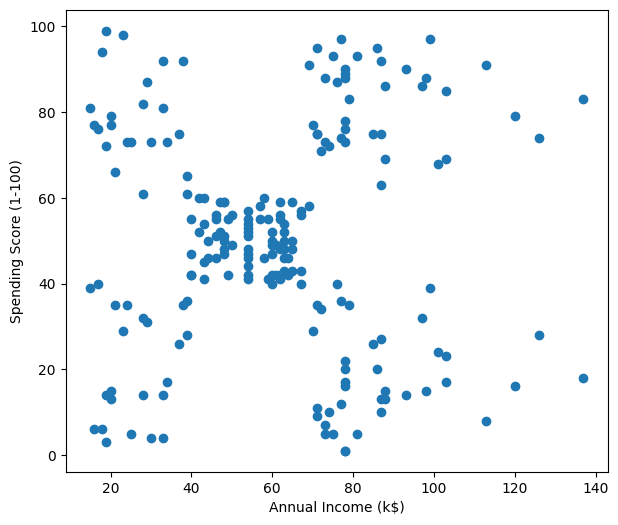

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
#standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(x_scaled)

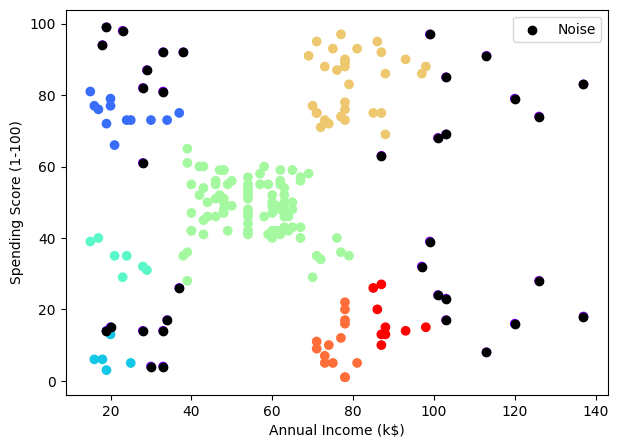

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=clusters,cmap='rainbow')
plt.scatter(df[clusters==-1]['Annual Income (k$)'],df[clusters==-1]['Spending Score (1-100)'],color='black',label='Noise')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#schouette score
from sklearn.metrics import silhouette_score
scorre=silhouette_score(x_scaled,clusters)
print('silhouette_score:',scorre)

silhouette_score: 0.31614121976731185


In [ ]:
eps_val=[0.2,0.3,0.5]
for eps in eps_val:
   print(f"\nEvaluating DBSCAN using eps={eps}")
   #apply DBSCAN
   dbscan=DBSCAN(eps=eps,min_samples=5)
   labels=dbscan.fit_predict(x_scaled)

   #no of clusters(inor noise label -1)
   unique_labels=set(labels)
   n_clusters=len(unique_labels)-(1 if  -1 in unique_labels else 0)

   #no of noise points
   n_noise=list(labels).count(-1)
   noise_ratio=n_noise/len(labels)

   print(f"Number of clusters: {n_clusters}")
   print(f"Number of noise points:" ,round(noise_ratio,2))


   #silhouette score
   if n_clusters>1:
     x_scaled=scaler.fit_transform(x)
     labels=dbscan.fit_predict(x_scaled)

     scorre=silhouette_score(x_scaled,labels)
     print(f"Silhouette score: {round(scorre,2)}")



Evaluating DBSCAN using eps=0.2
Number of clusters: 7
Number of noise points: 0.39
Silhouette score: 0.14

Evaluating DBSCAN using eps=0.3
Number of clusters: 7
Number of noise points: 0.17
Silhouette score: 0.32

Evaluating DBSCAN using eps=0.5
Number of clusters: 2
Number of noise points: 0.04
Silhouette score: 0.35


A ride-sharing company operates thousands of taxi rides every day in New York City.
Problems they face:
Pickup locations are not categorized
Some areas are very crowded, some are rarely used
GPS data contains noise (random, one-time pickups)
Demand hotspots change dynamically
The company wants to:
Discover natural pickup hotspots
Ignore random or rare pickup points
Understand high-density demand zones
Improve:
Driver allocation
Surge pricing
Route planning
They hire you as a Data Scientist to analyze pickup locations and identify natural demand clusters, without knowing how many hotspots exist.

1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.
2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.
3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/NewYorkCityTaxiTripDuration.csv'

df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1458639,False
1458640,False
1458641,False
1458642,False


In [ ]:
#data preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])


[[-0.51825403 -0.3116879   0.00816524]
 [ 0.47139432 -0.13083556  0.00816524]
 [-0.22403066 -0.39809937  0.00816524]
 [-0.68569823 -0.42983456  0.00816524]
 [-3.62806486  4.60248681  0.00816524]]


In [ ]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=0.2, min_samples=5)
labels_1 = db1.fit_predict(X_scaled)


In [ ]:
db2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = db2.fit_predict(X_scaled)


In [ ]:
db3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = db3.fit_predict(X_scaled)


In [ ]:
import numpy as np

def evaluate(labels, name):
    unique_labels = set(labels)

    # Exclude noise (-1)
    n_clusters = len(unique_labels - {-1})
    noise_points = list(labels).count(-1)
    noise_ratio = noise_points / len(labels)

    print(f"\n{name}")
    print("Number of Clusters:", n_clusters)
    print("Number of Noise Points:", noise_points)
    print("Noise Ratio:", round(noise_ratio, 4))


In [ ]:
evaluate(labels_1, "Experiment 1 (eps=0.2)")
evaluate(labels_2, "Experiment 2 (eps=0.3)")
evaluate(labels_3, "Experiment 3 (eps=0.5)")



Experiment 1 (eps=0.2)
Number of Clusters: 11
Number of Noise Points: 100
Noise Ratio: 0.0033

Experiment 2 (eps=0.3)
Number of Clusters: 4
Number of Noise Points: 61
Noise Ratio: 0.002

Experiment 3 (eps=0.5)
Number of Clusters: 4
Number of Noise Points: 29
Noise Ratio: 0.001


In [ ]:
from sklearn.metrics import silhouette_score

def compute_silhouette(X, labels, name):
    mask = labels != -1

    if len(set(labels[mask])) > 1:
        score = silhouette_score(X[mask], labels[mask])
        print(f"{name} Silhouette Score:", round(score, 4))
        return score
    else:
        print(f"{name} Silhouette Score: Not Applicable")
        return None


In [ ]:
score1 = compute_silhouette(X_scaled, labels_1, "Experiment 1")
score2 = compute_silhouette(X_scaled, labels_2, "Experiment 2")
score3 = compute_silhouette(X_scaled, labels_3, "Experiment 3")


Experiment 1 Silhouette Score: 0.4664
Experiment 2 Silhouette Score: 0.6573
Experiment 3 Silhouette Score: 0.3631


In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, labels, title):
    plt.figure(figsize=(6,5))

    unique_labels = set(labels)

    for label in unique_labels:
        if label == -1:
            plt.scatter(
                X[labels == label][:,0],
                X[labels == label][:,1],
                c="black",
                s=5,
                label="Noise"
            )
        else:
            plt.scatter(
                X[labels == label][:,0],
                X[labels == label][:,1],
                s=5,
                label=f"Cluster {label}"
            )

    plt.title(title)
    plt.xlabel("Latitude (scaled)")
    plt.ylabel("Longitude (scaled)")
    plt.legend(markerscale=4)
    plt.show()


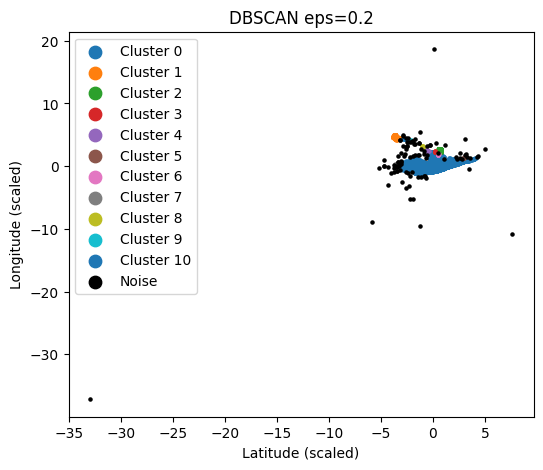

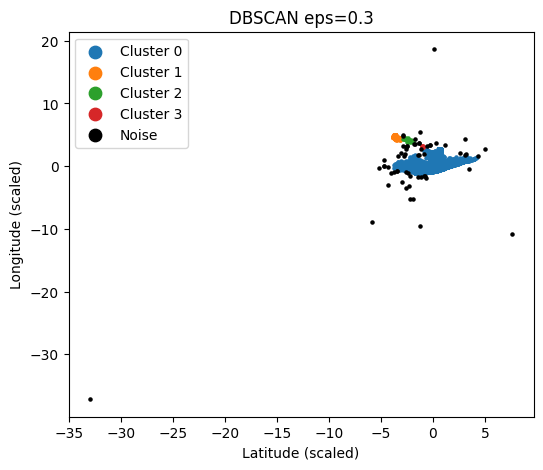

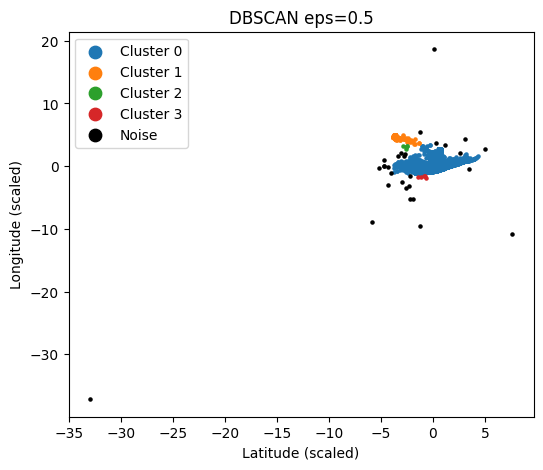

In [ ]:
plot_clusters(X_scaled, labels_1, "DBSCAN eps=0.2")
plot_clusters(X_scaled, labels_2, "DBSCAN eps=0.3")
plot_clusters(X_scaled, labels_3, "DBSCAN eps=0.5")


In [ ]:
results = {
    0.2: score1,
    0.3: score2,
    0.5: score3
}

best_eps = None
best_score = -1

for eps, score in results.items():
    if score is not None and score > best_score:
        best_score = score
        best_eps = eps

print("\nBest eps value =", best_eps)



Best eps value = 0.3
